In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df=pd.read_csv("/Users/deepakshinde/Downloads/UserData (2).csv")
df2=pd.read_csv("/Users/deepakshinde/Downloads/Opportunity Wise Data.csv")

In [16]:
df

,PreferredSponsors,Gender,Country,Degree,Sign Up Date,city,zip,isFromSocialMedia
0,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Male,Nigeria,Undergraduate Student,2023-07-23T08:05:58.602Z,Owerri,460103,False
1,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Male,India,Undergraduate Student,2023-04-24T09:57:07.405Z,kottayam,686501,False
2,"[""GlobalShala"",""Illinois Institute of Technolo...",NaN,India,NaN,2022-10-14T17:13:36.303Z,NaN,NaN,False
3,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",NaN,Albania,NaN,2023-06-06T12:29:01.772Z,NaN,NaN,True
4,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Female,Ghana,Not in Education,2023-06-15T16:31:42.719Z,Kumasi,AT-1214-9090,False
...,...,...,...,...,...,...,...,...
27557,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Female,Botswana,Undergraduate Student,2023-04-08T05:30:44.705Z,Gaborone,123456,True
27558,"[""GlobalShala"",""Saint Louis University"",""Illin...",Male,United States,Undergraduate Student,2023-02-01T20:46:32.637Z,Coppell,75019,False
27559,"[""GlobalShala"",""Illinois Institute of Technolo...",Male,United States,High School Student,2022-09-22T14:06:56.114Z,Austin,78727,False
27560,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Male,Pakistan,NaN,2023-06-16T04:18:38.811Z,Daraban kalan,29111,True


In [17]:
df.isnull().sum()

PreferredSponsors        0
Gender                9535
Country                 62
Degree               10812
Sign Up Date             0
city                  9534
zip                   9544
isFromSocialMedia        9
dtype: int64

In [18]:
df.shape

(27562, 8)

In [26]:

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert 'sign_up_date' to datetime format
df['sign_up_date'] = pd.to_datetime(df['sign_up_date'], errors='coerce')

# Handle missing values:
# - Fill 'gender', 'degree', 'city' with 'Unknown'
# - Drop rows where 'country' is missing (since it's crucial data)
df['gender'].fillna('Unknown', inplace=True)
df['degree'].fillna('Unknown', inplace=True)
df['city'].fillna('Unknown', inplace=True)
df['zip'].fillna('Unknown', inplace=True)
df.dropna(subset=['country'], inplace=True)

# Convert 'preferredsponsors' from string representation of list to actual list
df['preferredsponsors'] = df['preferredsponsors'].apply(lambda x: eval(x) if isinstance(x, str) else [])

# Convert 'isfromsocialmedia' to boolean
df['isfromsocialmedia'] = df['isfromsocialmedia'].astype(str).str.lower().map({'true': True, 'false': False})
df['isfromsocialmedia'].fillna(df['isfromsocialmedia'].mode()[0], inplace=True)
# Convert 'preferredsponsors' lists to strings for deduplication
df['preferredsponsors'] = df['preferredsponsors'].astype(str)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Save the cleaned dataset
cleaned_file_path = "Cleaned_UserData.csv"  # Change to your preferred save location
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data saved to {cleaned_file_path}")

Cleaned data saved to Cleaned_UserData.csv


In [27]:
df.isnull().sum()

preferredsponsors    0
gender               0
country              0
degree               0
sign_up_date         0
city                 0
zip                  0
isfromsocialmedia    0
dtype: int64


Signups per Month:
signup_month
2022-05       2
2022-08     611
2022-09     913
2022-10     935
2022-11     523
2022-12     270
2023-01     459
2023-02     602
2023-03    2026
2023-04    1444
2023-05    2373
2023-06    7933
2023-07    4453
2023-08    3010
2023-09     953
2023-10     752
2023-11     241
Freq: M, Name: count, dtype: int64


/var/folders/60/y2rlkwmd105cwhq5f74qmprh0000gn/T/ipykernel_51904/547283838.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['signup_month'] = df['sign_up_date'].dt.to_period('M')
/var/folders/60/y2rlkwmd105cwhq5f74qmprh0000gn/T/ipykernel_51904/547283838.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['signup_month'] = df['sign_up_date'].dt.to_period('M')


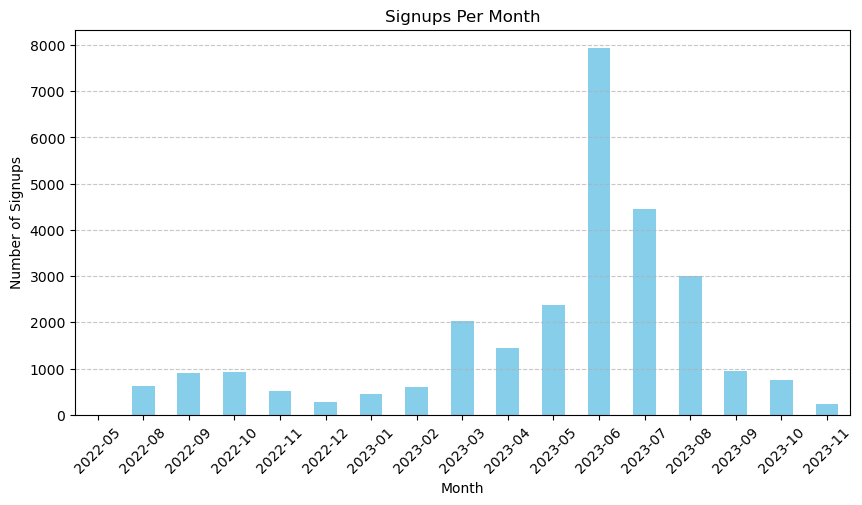

In [31]:
print("\nSignups per Month:")
df['signup_month'] = df['sign_up_date'].dt.to_period('M')
print(df['signup_month'].value_counts().sort_index())

df['signup_month'] = df['sign_up_date'].dt.to_period('M')
signups_per_month = df['signup_month'].value_counts().sort_index()
plt.figure(figsize=(10,5))
signups_per_month.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.title('Signups Per Month')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Users from Social Media vs Not:
From Social Media: 13820
Not from Social Media: 13680


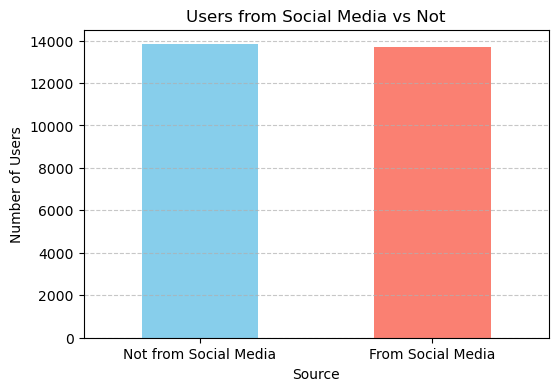

In [30]:
# Analyze the number of users from social media vs not
social_media_counts = df['isfromsocialmedia'].value_counts()

print("\nUsers from Social Media vs Not:")
print(f"From Social Media: {social_media_counts.get(True, 0)}")
print(f"Not from Social Media: {social_media_counts.get(False, 0)}")

# Plot the distribution
plt.figure(figsize=(6, 4))
social_media_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Source')
plt.ylabel('Number of Users')
plt.title('Users from Social Media vs Not')
plt.xticks(ticks=[0, 1], labels=['Not from Social Media', 'From Social Media'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Signups by Day of the Week:
signup_day
Friday       5357
Thursday     5178
Wednesday    4033
Tuesday      3942
Saturday     3025
Monday       2993
Sunday       2972
Name: count, dtype: int64

Signups by Hour of the Day:
signup_hour
0      633
1      674
2      701
3      822
4     1769
5     1183
6     1196
7     1120
8     1108
9     1151
10    1139
11    1128
12    1087
13    1361
14    1491
15    1498
16    1630
17    1675
18    1554
19    1267
20     974
21     886
22     794
23     659
Name: count, dtype: int64


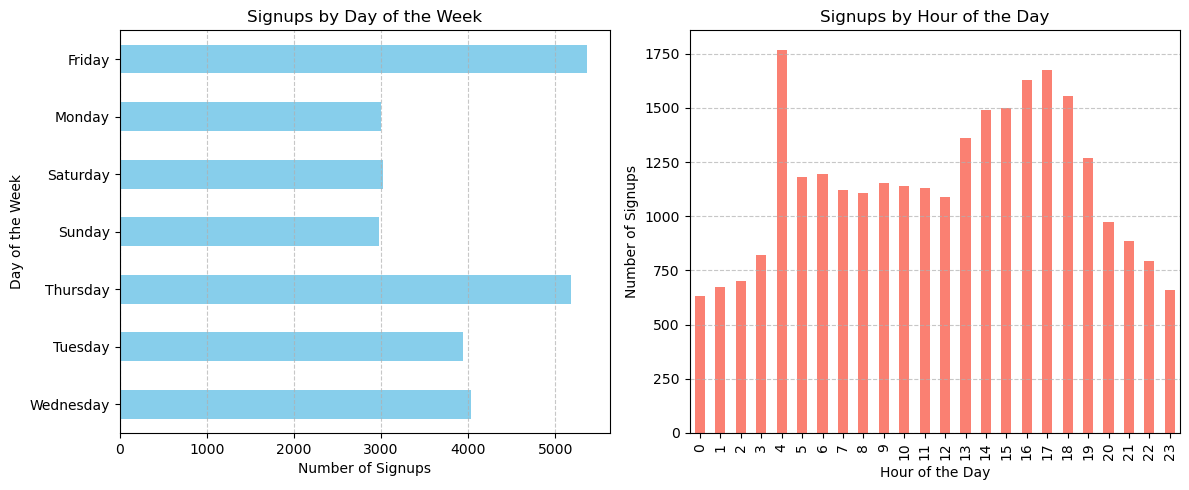

In [32]:
# Analyze registration patterns

# Signups by day of the week
df['signup_day'] = df['sign_up_date'].dt.day_name()
signups_by_day = df['signup_day'].value_counts()

print("\nSignups by Day of the Week:")
print(signups_by_day)

# Signups by hour of the day
df['signup_hour'] = df['sign_up_date'].dt.hour
signups_by_hour = df['signup_hour'].value_counts().sort_index()

print("\nSignups by Hour of the Day:")
print(signups_by_hour)

# Plot registration patterns
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot signups by day of the week
signups_by_day.sort_index(ascending=False).plot(kind='barh', ax=ax[0], color='skyblue')
ax[0].set_xlabel("Number of Signups")
ax[0].set_ylabel("Day of the Week")
ax[0].set_title("Signups by Day of the Week")
ax[0].grid(axis='x', linestyle='--', alpha=0.7)

# Plot signups by hour of the day
signups_by_hour.plot(kind='bar', ax=ax[1], color='salmon')
ax[1].set_xlabel("Hour of the Day")
ax[1].set_ylabel("Number of Signups")
ax[1].set_title("Signups by Hour of the Day")
ax[1].set_xticks(range(0, 24))
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()




User Distribution by Gender:
gender
Male                     11027
Unknown                   9473
Female                    6910
Don't want to specify       75
Other                       15
Name: count, dtype: int64


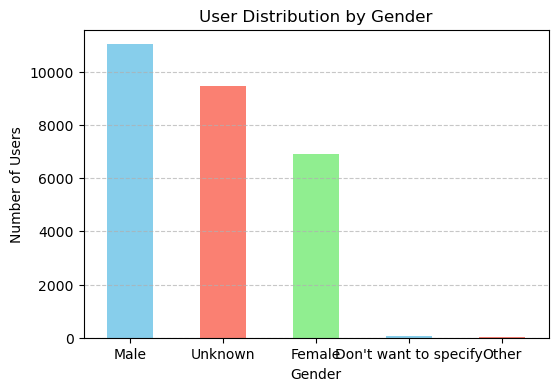

In [33]:
# Gender-based analysis
gender_counts = df['gender'].value_counts()

print("\nUser Distribution by Gender:")
print(gender_counts)

# Plot gender distribution
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.title('User Distribution by Gender')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Top 10 Countries by User Signups:
country
India            11893
Nigeria           4357
United States     3691
Pakistan          1928
Ghana             1124
Egypt              897
Bangladesh         422
Kenya              302
Vietnam            290
Nepal              193
Name: count, dtype: int64

Top 10 Cities by User Signups:
city
Unknown        9472
Hyderabad       743
Saint Louis     469
Lagos           450
Accra           336
Chicago         318
Pune            268
Mumbai          265
Chennai         241
Ibadan          219
Name: count, dtype: int64


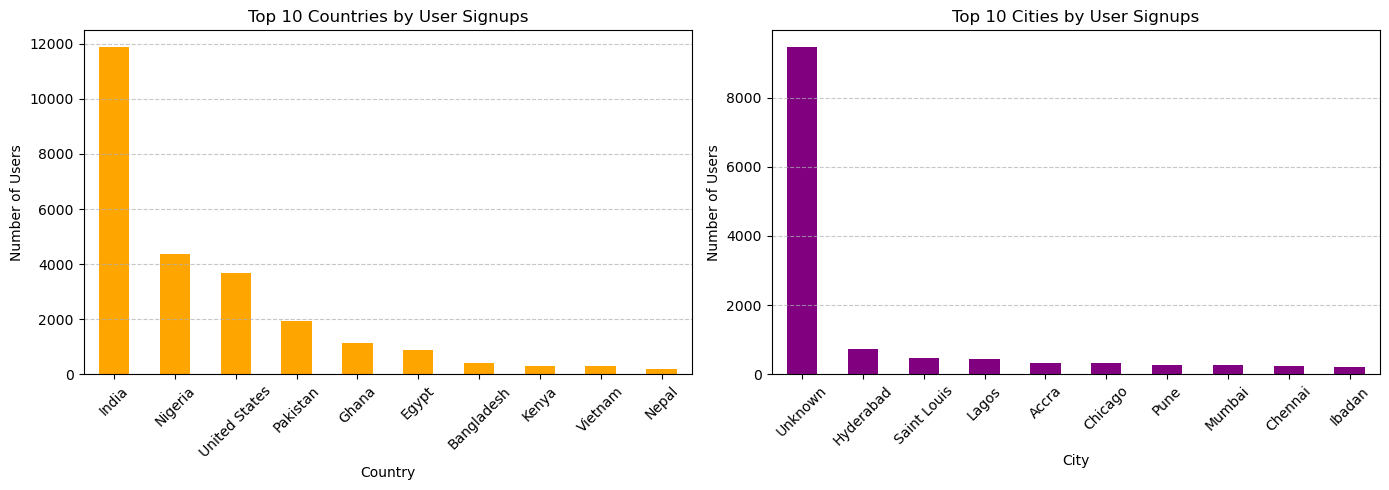

In [34]:
# Country-based analysis
top_countries = df['country'].value_counts().head(10)  # Top 10 countries

print("\nTop 10 Countries by User Signups:")
print(top_countries)

# City-based analysis
top_cities = df['city'].value_counts().head(10)  # Top 10 cities

print("\nTop 10 Cities by User Signups:")
print(top_cities)

# Plot location analysis
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Top countries plot
top_countries.plot(kind='bar', ax=ax[0], color='orange')
ax[0].set_xlabel("Country")
ax[0].set_ylabel("Number of Users")
ax[0].set_title("Top 10 Countries by User Signups")
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Top cities plot
top_cities.plot(kind='bar', ax=ax[1], color='purple')
ax[1].set_xlabel("City")
ax[1].set_ylabel("Number of Users")
ax[1].set_title("Top 10 Cities by User Signups")
ax[1].tick_params(axis='x', rotation=45)
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
